### 1. Класи задач, що розв’язують НМ

Класифікація: У цьому типі завдань НМ просять вказати, до якої з k категорій належить деяка вхідна інформація. Для розв'язання цієї задачі алгоритм навчання зазвичай просять обчислити функцію f : Rn → {1, . . . , k}. Коли y = f(x), модель відносить вхідні дані, описані вектором x, до категорії, ідентифікованої числовим кодом y.  

Регресія: У цьому типі завдань НМпросять передбачити числове значення за деякими вхідними даними. Щоб вирішити цю задачу, алгоритм навчання просять вивести функцію f : Rn → R.

Транскрипція: У цьому типі завдань систему машинного навчання просять спостерігати за відносно неструктурованим представленням певних даних і транскрибувати їх у дискретну, текстову форму.

Машинний переклад: У задачі машинного перекладу вхідні дані вже складаються з послідовності символів певною мовою, і комп'ютерна програма повинна перетворити їх на послідовність символів іншою мовою.

Структурований вивід: До завдань структурованого виведення належать будь-які завдання, де вихідними даними є вектор (або інша структура даних, що містить кілька значень) з важливими взаємозв'язками між різними елементами.

Виявлення аномалій: У цьому типі завдань комп'ютерна програма просіює набір подій або об'єктів і позначає деякі з них як незвичні або нетипові.
Синтез і вибірка: У цьому типі завдань алгоритм машинного навчання просять згенерувати нові приклади, схожі на ті, що містяться в навчальних даних.

Знешумлення:  У цьому типі завдань алгоритм машинного навчання отримує на вході зіпсований приклад x ̃ ∈ Rn, отриманий за допомогою невідомого процесу спотворення з чистого прикладу x ∈ Rn.

Кластеризація: задача розбиття заданої вибірки об'єктів (ситуацій) на підмножини, які називаються кластерами, так, щоб кожен кластер складався з схожих об'єктів, а об'єкти різних кластерів істотно відрізнялися.

Та інші

Також можна навчати виконувати нейромережу виконувати комбінації декількох задач, за допомогою різних архітектурних поєднань.


### 2.	Етапи побудови проекту з НМ

1.	Визначення проблеми:
Чітко визначте проблему, яку потрібно вирішити, або мету, яку ви хочете досягти за допомогою машинного навчання.
Зрозумійте бізнес-вимоги та цілі.
Визначте показники успіху, які будуть використовуватися для оцінки ефективності моделі. (Бажано побудувати зв’язок між бізнес метриками та математичними метриками)

На цьому ж етапі обов’язково потрібно визначити, чи взагалі потрібно застосовувати тут машинне навчання, можливо можна обійтися тривіальною алгоритмікою.

2.	Збір даних (опціонально):
Потрібно проаналізувати відповідні джерела даних, необхідні для навчання та оцінки.
Забезпечити якість даних, вирішуючи такі проблеми, як пропуски, викиди та невідповідності і помилки у розмітці анотаторів.
Розділіти дані на навчальні, валідаційні (обов’язково) та тестові набори.

3.	Попередня обробка даних:
Очищення даних, включаючи обробку відсутніх значень, викидів і шуму. Кодування категоріальних змінних у формат, придатний для алгоритмів машинного навчання.
Створення нових похідних фіч, щоб покращити продуктивність моделі. Нормалізація ознак. Також треба це все зібрати в один пайплай, аби зручно потім застосовувати під час використання, а не тільки тренування.

4.	Вибір моделі та навчання:
Вибір  алгоритму машинного навчання на основі типу задачі (класифікація, регресія, кластеризація тощо). Побудова бейзлайну: навчання початкової моделі. Оцінка моделі за допомогою валідаційного набору.

5.	Оцінка та валідація моделі:
Оцінка продуктивність моделі, використовуючи відповідні метрики оцінки.
Перевірка узагальнення моделі на тестовому наборі даних.
6.	Налаштування та оптимізація моделі:
Точне налаштування гіперпараметрів моделі за допомогою таких методів.
Оптимізація архітектури моделі або методів ансамблю для підвищення якості.
7.	Деплой:
Насправді найважча частина, адже тут вже починаються всі відповідні процеси software engineering.
8.	Обслуговування та ітерації:
Ітерації моделі шляхом включення нових даних, перенавчання оновленим алгоритмам або коригування функцій на основі зворотного зв'язку.


### 3. Функція завантаження навчаючої та текстової вибірки. Детально на прикладі.

Завантаження може відбуватися будь звідки, хоч build-in датасет у фреймворку типу keras.datasets.imdb, хоч пул з бази даних.

Наприклад, можна завантажимо CIFAR10 з торча та зробимо спліт

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# завантажимо дані
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True)

# робимо спліт, але по індексах, бо торч завантажує саме torch.Dataset
train_indices, val_indices = train_test_split(list(range(len(train_dataset))), test_size=0.2, random_state=42)

# потім просто обираємо ці семлпи
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)

train_loader = DataLoader(train_dataset, batch_size=64, sampler=train_sampler)
val_loader = DataLoader(train_dataset, batch_size=64, sampler=val_sampler)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### 4. Дослідження даних. Основні функції. Розбиття даних на перевірочні та тестові.

Дослідження даних загалом відбувається в залежності від їх природи. Якщо це table ML, то можна просто використовувати вбудовані методи для пошуку нульових значень і фільтрації:


DataFrame.isnull(), DataFrame.notnull(): Виявлення відсутніх значень.
DataFrame.dropna(), DataFrame.fillna(): Обробка відсутніх значень.

пошук різних кореляцій і виділення фічей тд

Розбиття обов'язково потрібно робити на тренувальний, валідаційний та тестовий сети (інколи можна обійтися без тестового, якщо мало даних). Валідаційний сет потрібен обов'язково для того, аби перевірити перформанс моделі на небачених даних і підібрати оптимальні параметри для її роботи. Тестовий сет вибористовується лише для оцінки моделі. Коли мало даних, можна використати cross-validation, аби визначити, якість моделі


### 5. Оцінка якості роботи НМ.

для оцінки якості моделі використовуються метрики, відповідні до типу задачі, який ми вирішуємо та бізнес метрик (чого ми саме хочемо отримати від моделі).

Метрики класифікації:

Точність: Відсоток правильно передбачених екземплярів від загальної кількості екземплярів.
Влучність: Вимірює точність позитивних прогнозів. Це відношення істинно позитивних результатів до суми істинних і хибних спрацьовувань.
Повнота: Вимірює частку фактичних позитивних результатів, які були правильно передбачені. Це відношення істинно-позитивних результатів до суми істинно-позитивних і хибно-негативних результатів.
F1: середнє гармонійне значення точності та пригадування. Забезпечує баланс між точністю та пригадуванням.
ROC-AUC: Робоча характеристика приймача - площа під кривою. Вимірює площу під кривою ROC, яка ілюструє компроміс між частотою істинних позитивних і хибнопозитивних результатів.

Метрики регресії:
Середня абсолютна похибка (MAE): Середнє значення абсолютної різниці між прогнозами та фактичними значеннями.
Середня квадратична помилка (MSE): Середня квадратична різниця між прогнозами та фактичними значеннями.
Root Mean Squared Error (RMSE): Квадратний корінь з MSE, що забезпечує інтерпретовану шкалу, подібну до вихідної цільової змінної.
R-квадрат (коефіцієнт детермінації): Показує частку дисперсії залежної змінної, яку можна передбачити на основі незалежної змінної (змінних).

### 6. Обрати текст (книгу) з ресурсу запропонованого на лекції. Підготувати його до використання.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import spacy
import requests

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

url = "https://www.gutenberg.org/cache/epub/6130/pg6130.txt"
text = requests.get(url).text

# скоротимо текст
text = text[10000:20000]


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in text if word.lower() not in stop_words]


doc = nlp(" ".join(filtered_words))
lemmatized_words_spacy = [token.lemma_ for token in doc]

processed_text = " ".join(lemmatized_words_spacy)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
### 7. Обрати 10 речень. Визначити емоційне забарвлення тексту та окремо речень. Зробити висновки.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import random


nltk.download('vader_lexicon')

sentences = nltk.sent_tokenize(text)
selected_sentences = random.sample(sentences, 10)
sid = SentimentIntensityAnalyzer()
sentiment_scores = []
for sentence in selected_sentences:
    sentiment_scores.append(sid.polarity_scores(sentence)["compound"])

for i, sentence in enumerate(selected_sentences):
    print(f"Sentence {i+1}: {sentence.strip()} - Sentiment Score: {sentiment_scores[i]}")

Sentence 1: He paid little attention to
what he said, and blamed Glaucus for his stupidity in taking in and
feeding maimed and enfeebled persons. - Sentiment Score: -0.7184
Sentence 2: Here, the Cumans say, he composed an epitaph
on Gordius, king of Phrygia, which has however, and with greater
probability, been attributed to Cleobulus of Lindus. - Sentiment Score: 0.3612
Sentence 3: He then went up to
him, and inquired who he was, and how he had come to desolate places
and untrodden spots, and of what he stood in need. - Sentiment Score: 0.0
Sentence 4: Here he met with an adventure,
which we will continue in the words of our author. - Sentiment Score: 0.3182
Sentence 5: Whereupon Homer addressed Glaucus thus: O
Glaucus, my friend, prythee attend to my behest. - Sentiment Score: 0.4939
Sentence 6: The whole is hewn out of the
mountain, is rude, indistinct, and probably of the most remote
antiquity.”

So successful was this school, that Homer realised a considerable
fortune. - Sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Бачимо, позитивний сентімент визначено досить точно, але оскільки греки в Іліаді говорять досить поетично увесь час, він трішки перебільшений

In [ ]:
from textblob import TextBlob

sample = TextBlob(text[:200])

print(sample)
print(sample.correct())

proposals of marriage, declaring himself, as a further inducement,
willing to adopt her son, who, he asserted, would become a clever man,
if he were carefully brought up.”

They were married; care
proposals of marriage, declaring himself, as a further inducement,
willing to adopt her son, who, he asserted, would become a clever man,
if he were carefully brought up.”

They were married; care


In [ ]:
# У такому тексті важко знайти помилки, додамо їх навмисно!

In [ ]:
sample = """proposals of mariage, declaring himself, as a further inducement,
willing to adopt her son, who, he aserted, would become a clever man,
if he were carefuly brougt up.”

They were married; care"""

sample = TextBlob(sample)
print(sample)
print(sample.correct())

proposals of mariage, declaring himself, as a further inducement,
willing to adopt her son, who, he aserted, would become a clever man,
if he were carefuly brougt up.”

They were married; care
proposals of marriage, declaring himself, as a further inducement,
willing to adopt her son, who, he asserted, would become a clever man,
if he were carefully brought up.”

They were married; care


In [ ]:
# працює досить гарно з поширеними помилками

### 9. Побудувати візуалізацію частот входження слів. Подати у вигляді словарної хмари. Форму створити самостійно.

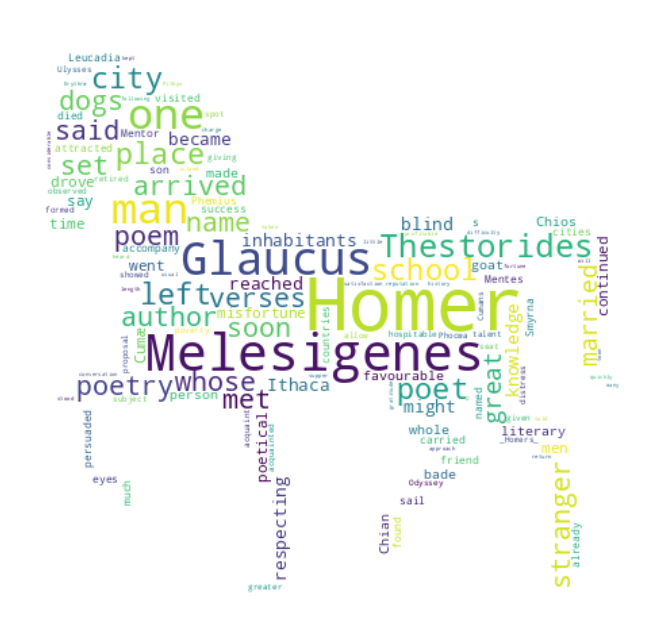

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2
mask_image = cv2.imread("/content/th-1988337902.jpeg")
inverted_mask = cv2.bitwise_not(mask_image)


def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400,  mask=inverted_mask, background_color='white').generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


generate_wordcloud(text)

In [ ]:
# Homer одне з найпопулярніших, не дивно

### 10. підрахувати кільксіть унікальних слів

In [ ]:
from nltk.probability import FreqDist

def count_unique_words(text):
    words = word_tokenize(text)
    freq_dist = FreqDist(words)
    unique_words_count = len(freq_dist)

    return unique_words_count

unique_words = count_unique_words(text)
print("Number of unique words:", unique_words)

Number of unique words: 727


### 11. Знайти топ н-грам

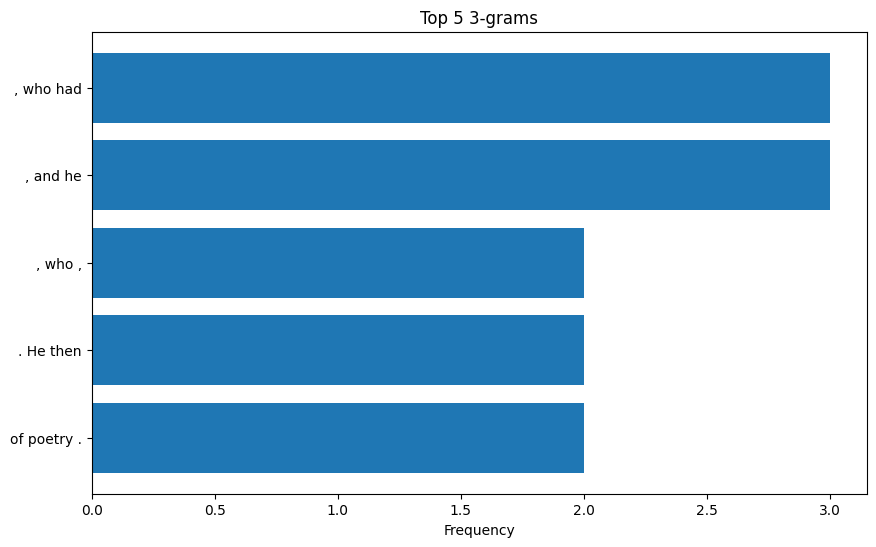

In [ ]:
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt


def generate_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    ngrams_list = list(ngrams(tokens, n))
    return ngrams_list

def ngram_frequency(text, n):
    ngrams_list = generate_ngrams(text, n)
    frequency = Counter(ngrams_list)
    return frequency

def visualize_top_ngrams(text, n, top_n):
    frequencies = ngram_frequency(text, n)
    top_ngrams = frequencies.most_common(top_n)

    ngram_labels = [' '.join(ngram) for ngram, freq in top_ngrams]
    ngram_values = [freq for ngram, freq in top_ngrams]

    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, ngram_values)
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} {n}-grams')
    plt.gca().invert_yaxis()
    plt.show()


N = 3
top_n = 5

visualize_top_ngrams(text, N, top_n)

Найбільш популярні н-грами виявилися не дуже цікавими, можна виділити хібащо популярність поезії 'of poetry' у книзі.